Support Vector Machines

Linear SVM Classification


Creates a "street" that divides classes. The street is set to be as wide as possible without having any sample inside (meaning all samples are outside of the street)
SVM benefit from feature scaling

In [47]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
mask = iris["target"] < 2 
X = iris["data"][["petal length (cm)", "petal width (cm)"]][mask].values
y = iris["target"][mask]

Decision Boundary has the following equation:

$w_0 * x_0 + w_1 * x_1 + b = 0 \leftrightarrow x_1 = (-x_0 * w_0 - b) / w_1$

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_boundary(svm_classifier, xmin, xmax):
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_classifier.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#AAA", zorder=-1)    

In [49]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="linear", C=100_000.)
svm_classifier.fit(X, y)

SVC(C=100000.0, kernel='linear')

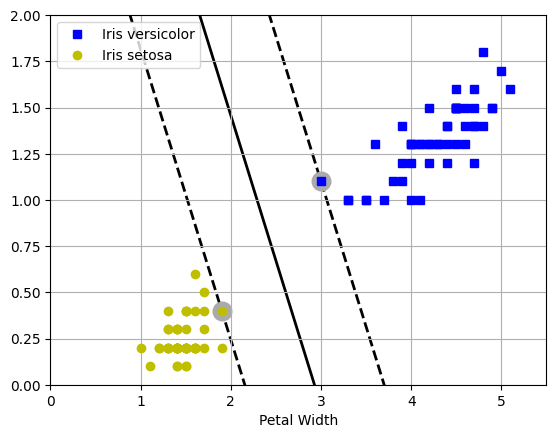

In [51]:
plot_svc_decision_boundary(svm_classifier, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal Length")
plt.xlabel("Petal Width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])
plt.grid()

Soft Margin Classification

Sometimes it is impossible to keep all samples outside the street because the classes are not linearly separable or an outlier forces the street to be very tiny when it could be larger.
Examples: An outlier from class A is inside class B

We can control the softness of the street using an hyperparameter C. When C is low a lot of samples are allowed inside the street, when C is high none or barely any samples are allowed.

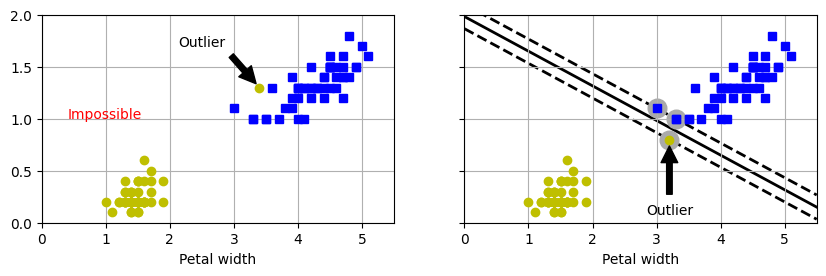

In [55]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_classifier1 = SVC(kernel="linear", C=10**9)
svm_classifier1.fit(Xo2, yo2)

figure, axis = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axis[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.4, 1.0, "Impossible", color="red")
plt.xlabel("Petal length")
plt.xlabel("Petal width")
plt.annotate("Outlier", xy=(X_outliers[0][0], X_outliers[0][1]), xytext=(2.5, 1.7),
             ha="center", arrowprops=dict(facecolor="black", shrink=0.1))
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.sca(axis[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_classifier1, 0, 5.5)
plt.annotate(
    "Outlier", xy=(X_outliers[1][0], X_outliers[1][1]), xytext=(3.2, 0.08), 
    ha="center", arrowprops=dict(facecolor="black", shrink=0.1)
)
plt.xlabel("Petal length")
plt.xlabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()